<a href="https://colab.research.google.com/github/tasyaaash29/TI01_Aulya-Natasya_Praktikum-ML/blob/main/college.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
path = "/content/drive/MyDrive/Praktikum ML/Praktikum07/data/college.csv"

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [146]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum07/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [148]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [149]:
df.duplicated().sum()

np.int64(0)

In [150]:
df = df.drop_duplicates()

In [151]:
df.duplicated().sum()

np.int64(0)

In [152]:
df = pd.DataFrame(df)
df = df.rename(columns={
    'StudentID':'murid',
    'Gender':'jenis_kelamin',
    'Parent_income':'pendapatan_ortu',
    'IQ':'iq',
    'Encourage':'encourage',
    'Plan':'rencana',
})

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   murid            8000 non-null   int64 
 1   jenis_kelamin    8000 non-null   object
 2   pendapatan_ortu  8000 non-null   int64 
 3   iq               8000 non-null   int64 
 4   encourage        8000 non-null   object
 5   rencana          8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


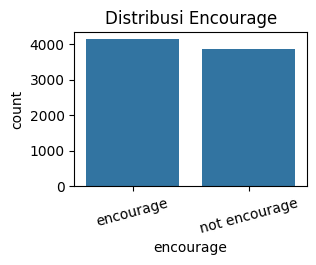

In [154]:
plt.figure(figsize=(3, 2))
sns.countplot(x='encourage', data=df)
plt.title('Distribusi Encourage')
plt.xticks(rotation=15)
plt.show()

In [155]:
# mapping label -> kode untuk target
stunting_cat = df['encourage'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)  # urutan kelas
df['encourage'] = stunting_cat.cat.codes              # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin','rencana']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,murid,jenis_kelamin,pendapatan_ortu,iq,encourage,rencana
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


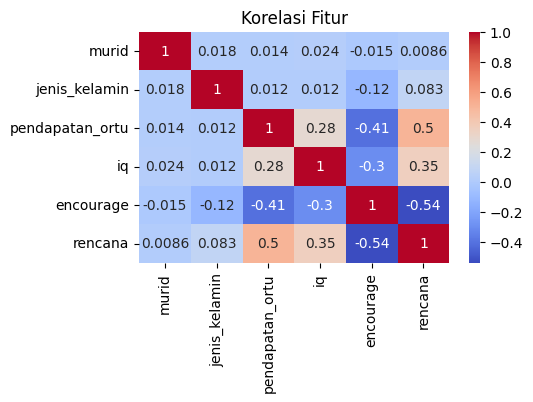

In [156]:
# Korelasi
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [157]:
# Memilih fitur dan target
feature_cols = ['murid', 'iq', 'pendapatan_ortu', 'rencana']
X = df[feature_cols]
y = df['encourage']

In [158]:
# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(6400, 1600)

In [159]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=48
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=48)

In [160]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test) # Move this line from the next cell

print("\nClassification Report:\n",
      classification_report(
          y_test,
          y_pred,
          labels=[0, 1],  # urutan labelnya
          target_names=['encourage', 'no encourage']  # harus string & jumlahnya sama
      ))


Classification Report:
               precision    recall  f1-score   support

   encourage       0.84      0.68      0.75       827
no encourage       0.72      0.86      0.78       773

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600



In [161]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes
))

Akurasi: 76.88 %

Confusion Matrix:
 [[562 265]
 [105 668]]

Classification Report:
                precision    recall  f1-score   support

    encourage       0.84      0.68      0.75       827
not encourage       0.72      0.86      0.78       773

     accuracy                           0.77      1600
    macro avg       0.78      0.77      0.77      1600
 weighted avg       0.78      0.77      0.77      1600



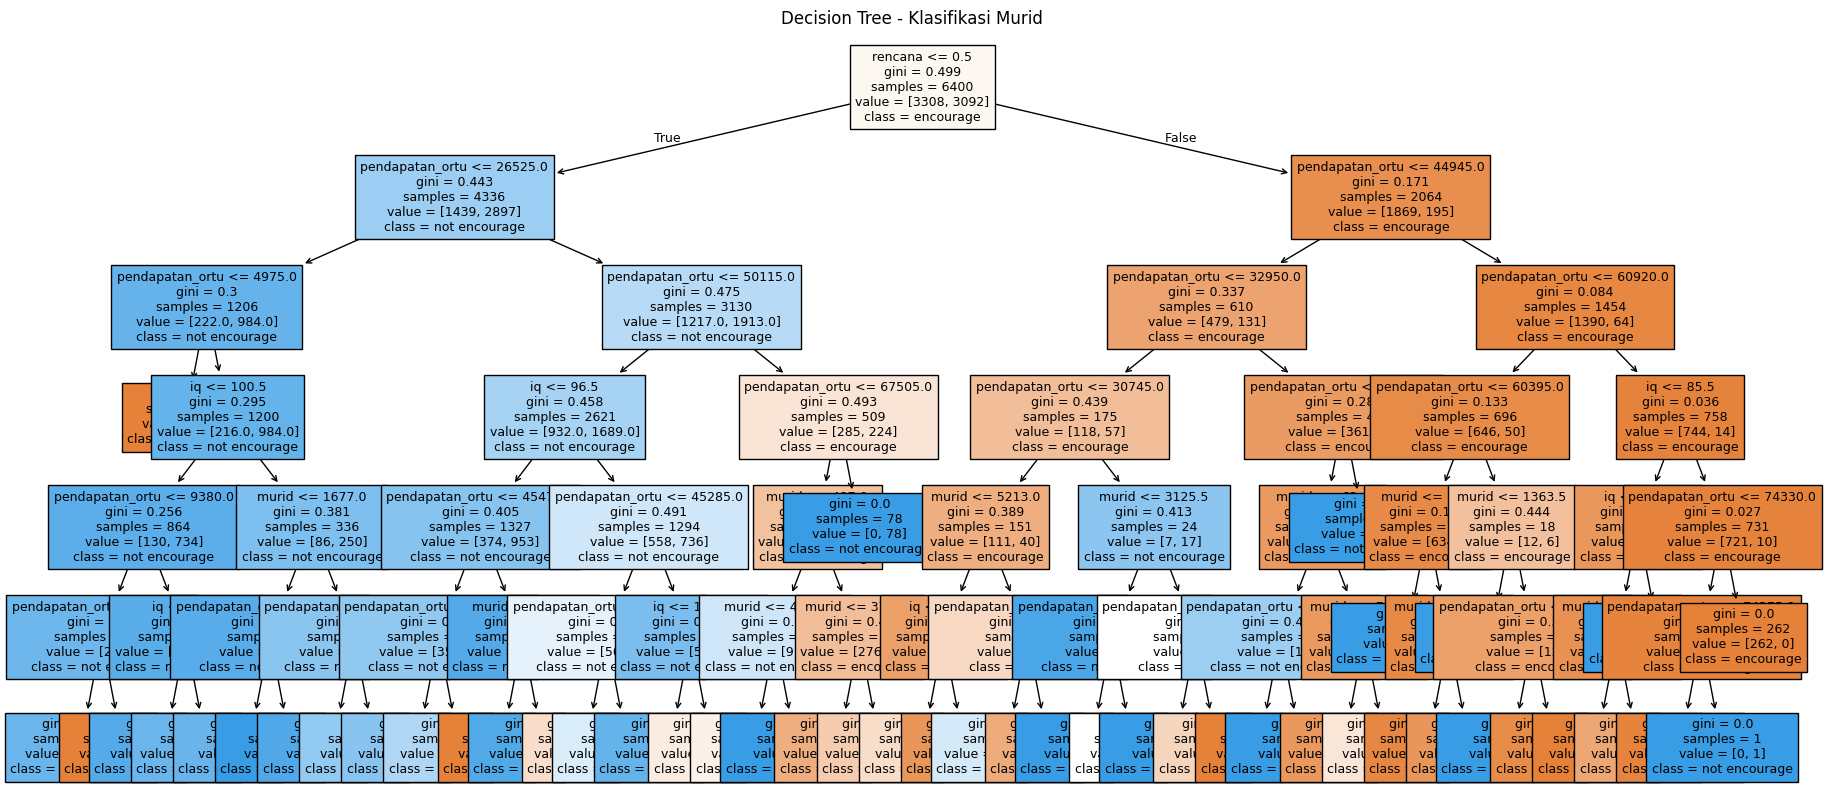

In [162]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes, # kembali ke nama kelas asli
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Murid")
plt.show()

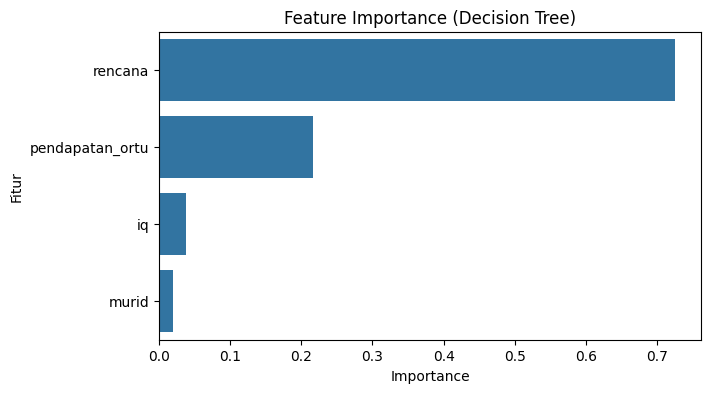

,0
rencana,0.725362
pendapatan_ortu,0.215918
iq,0.038365
murid,0.020355


In [163]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [164]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")


Best max_depth: 4 | Acc: 77.0 %


In [165]:
# Kode di bawah ini digunakan untuk memanggil folder praktikum yang berada di drive untuk mempermudah pemanggilan dataset
path = '/content/drive/MyDrive/Praktikum ML/Praktikum07'

In [166]:
import pandas as pd

df = pd.read_csv(path + '/data/dataset_satelit.csv')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [168]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [169]:
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


In [170]:
df.columns

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')

In [171]:
df ["Zn"].unique()

array([16.69, 14.47, 14.75, 15.32, 15.82, 13.38, 20.93,  8.46, 11.24,
       11.28, 12.98, 11.9 , 22.04, 21.43, 17.26, 16.31, 13.6 , 15.31,
        7.95, 21.05, 11.49, 13.  , 12.53, 10.23, 23.67, 16.02, 12.75,
       12.56, 21.69, 13.72, 13.73, 16.43, 17.84, 17.46, 34.26, 11.54,
       16.73, 10.3 , 11.94, 16.61, 28.7 , 23.  , 28.6 , 36.45, 31.27,
       57.55, 34.53, 39.56, 44.14, 24.87, 32.88, 47.85, 35.08, 32.86,
       28.84, 40.12, 57.12, 25.43, 26.19, 37.7 , 39.69, 30.37, 20.79,
       18.4 , 28.15, 34.09, 35.01, 37.63, 34.59, 18.16, 31.09, 34.16,
       25.62, 46.17, 31.38, 23.42, 30.58, 46.12, 32.27, 14.41, 11.51,
       12.69, 17.68, 19.15, 24.16, 16.46, 26.39, 17.4 , 15.92, 19.65,
       26.52, 20.33, 13.55, 17.51, 17.99, 18.91, 25.6 , 19.16, 14.35,
       14.62, 10.35, 15.23, 16.72, 27.52, 13.47, 16.98,  9.59, 18.57,
       14.92, 13.17, 28.9 , 13.69, 16.27, 24.46, 20.67, 12.07, 20.36,
        6.68, 14.02, 44.05, 12.32, 11.14, 19.  , 19.21,  9.03, 22.19,
        5.27, 14.18,

In [172]:
df["Zn"].value_counts()

,count
Zn,
11.61,3
14.24,3
12.07,3
14.02,3
11.09,2
...,...
10.54,1
14.05,1
25.50,1


In [173]:
from sklearn.model_selection import train_test_split

X = df[[ 'N', 'P', 'K', 'Fe', 'Ca', 'Mn',
       'Cu', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']]
y = df["Zn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [174]:
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


In [175]:
df.dropna(inplace=True)

# memverifikais missing vakue yang sudah dihapus
print(df.isnull().sum())

No           0
Longitude    0
Lattitude    0
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
b12          0
b11          0
b9           0
b8a          0
b8           0
b7           0
b6           0
b5           0
b4           0
b3           0
b2           0
b1           0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
beta0_vv     0
beta0_vh     0
dtype: int64


In [181]:
# Drop rows with any missing values from X_train
X_train.dropna(inplace=True)
y_train = y_train[X_train.index] # Also drop the corresponding target value

# Verify that the missing value has been dropped
print("Missing values in X_train after dropping row:")
display(X_train.isnull().sum())
print("\nShape of X_train after dropping row:")
display(X_train.shape)

Missing values in X_train after dropping row:


,0
N,0
P,0
K,0
Fe,0
Ca,0
Mn,0
Cu,0
B,0
b12,0
b11,0



Shape of X_train after dropping row:


(474, 29)

In [182]:
# Perintah model = LinearRegression() digunakan untuk membuat objek model regresi linear,
# sedangkan model.fit(X_train, y_train) digunakan untuk melatih model menggunakan data latih, yaitu fitur-fitur pada X_train dan target kadar unsur Zn pada y_train

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [183]:
# Model digunakan untuk memprediksi nilai Zn pada data uji menggunakan perintah y_pred = model.predict(X_test).
# Hasil prediksi tersebut kemudian dibandingkan dengan nilai sebenarnya (y_test) untuk menilai seberapa baik model bekerja.
# R² (R-squared) untuk mengukur tingkat kecocokan model terhadap data. Nilai R² sebesar 0,4497 menunjukkan bahwa sekitar 44,97% variasi data Zn dapat dijelaskan oleh model
# MAE (Mean Absolute Error) mengukur rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual, dengan hasil sekitar 4,39.
# RMSE (Root Mean Squared Error) mengukur besar kesalahan model dalam satuan yang sama dengan data asli, dengan hasil sekitar 5,87.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

R2 (test):             0.28643525617623267
MAE (kg):              5.192805451514957
RMSE (kg):             6.9203514181071375


In [184]:
# Perintah ini digunakan untuk menampilkan persamaan regresi linear yang dihasilkan oleh model.
# Nilai model.coef_[0] merepresentasikan kemiringan garis (slope) atau besarnya pengaruh variabel input terhadap hasil prediksi.
# model.intercept_ menunjukkan titik potong (intersep) pada sumbu Y ketika nilai X sama dengan nol

slope = model.coef_[0]
intercept = model.intercept_

print(f"Persamaan: y = {slope:.3f} * X + {intercept:.3f}")

Persamaan: y = 3.063 * X + 27.405


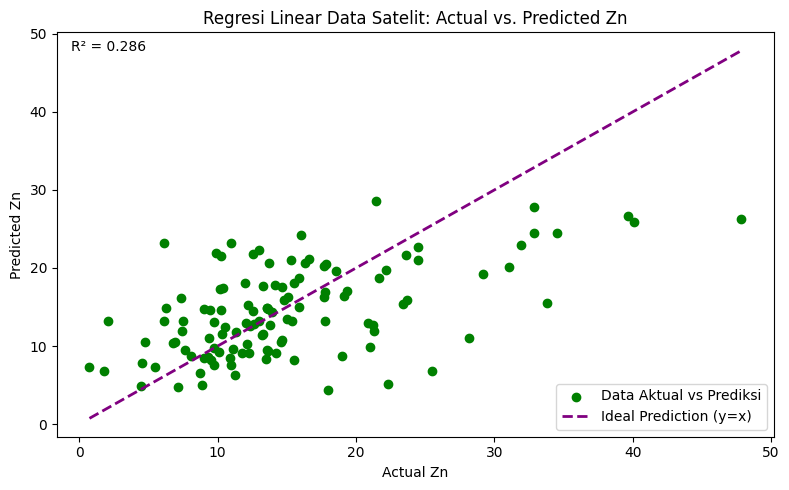

In [185]:
# Kode ini memvisualisasikan hasil regresi linear antara nilai aktual dan prediksi unsur Zn pada data satelit.
# Titik hijau menunjukkan perbandingan nilai aktual dan prediksi, sedangkan garis ungu putus-putus menunjukkan garis ideal (y = x).
# Hasil plot memperlihatkan bahwa data belum sepenuhnya sejajar dengan garis ideal, menandakan akurasi model masih terbatas.
# Dengan nilai R² sebesar 0,450, model mampu menjelaskan sekitar 45% variasi data Zn. Secara keseluruhan,
# model memiliki performa moderat dan masih dapat ditingkatkan dengan penambahan fitur atau metode yang lebih kompleks

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="green", label="Data Aktual vs Prediksi")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="purple", linestyle='--', linewidth=2, label="Ideal Prediction (y=x)")

plt.xlabel("Actual Zn")
plt.ylabel("Predicted Zn")
plt.title("Regresi Linear Data Satelit: Actual vs. Predicted Zn")


plt.text(
    0.02, 0.98,
    f"R² = {r2:.3f}",
    transform=plt.gca().transAxes,
    va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [186]:
# Perintah berikut digunakan untuk membuat tabel hasil prediksi regresi linear untuk membandingkan nilai Zn aktual dan Zn prediksi
# dengan menggunakan fitur penting seperti P, b8, b8a, Sigma_VH, dan Sigma_VV. Tabel yang akan dihasilkan akan menampilkan selisih error antara nilai aktual dan prediksi,
# serta akurasi (%) yang dihitung dari perbandingan keduanya.

y_pred_test = model.predict(X_test)

hasil = pd.DataFrame({
    # Sertakan beberapa fitur penting (ubah sesuai nama kolom kamu)
    "P": X_test["P"].to_numpy(),
    "b8": X_test["b8"].to_numpy(),
    "b8a": X_test["b8a"].to_numpy(),
    "Sigma_VH": X_test["Sigma_VH"].to_numpy(),
    "Sigma_VV": X_test["Sigma_VV"].to_numpy(),

    # Nilai target aktual dan hasil prediksi
    "Zn Aktual": y_test.to_numpy(),
    "Zn Prediksi": y_pred_test
})
hasil["Selisih Error (Zn)"] = hasil["Zn Prediksi"] - hasil["Zn Aktual"]
denom = hasil["Zn Aktual"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (Zn)"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil

,P,b8,b8a,Sigma_VH,Sigma_VV,Zn Aktual,Zn Prediksi,Selisih Error (Zn),Akurasi (%)
0,0.15,39.99313,40.70822,0.28280,0.33810,10.97,7.595148,-3.374852,69.235626
1,0.15,40.19622,41.40117,0.34660,0.39200,18.98,8.692825,-10.287175,45.799920
2,0.14,40.20590,39.34933,0.31120,0.37930,12.96,13.158760,0.198760,98.466355
3,0.12,0.39400,0.44410,0.03849,0.22082,5.44,7.323850,1.883850,65.370408
4,0.16,40.20388,40.56989,0.28940,0.37680,12.29,9.057503,-3.232497,73.698151
...,...,...,...,...,...,...,...,...,...
114,0.14,0.28500,0.31360,0.03842,0.18302,16.02,24.171646,8.151646,49.115817
115,0.14,0.36880,0.38690,0.03356,0.20946,22.18,19.731962,-2.448038,88.962857
116,0.18,40.05102,40.03196,0.33040,0.36690,15.53,8.225311,-7.304689,52.964011
117,0.18,0.35480,0.37360,0.04059,0.20197,13.90,14.308456,0.408456,97.061466


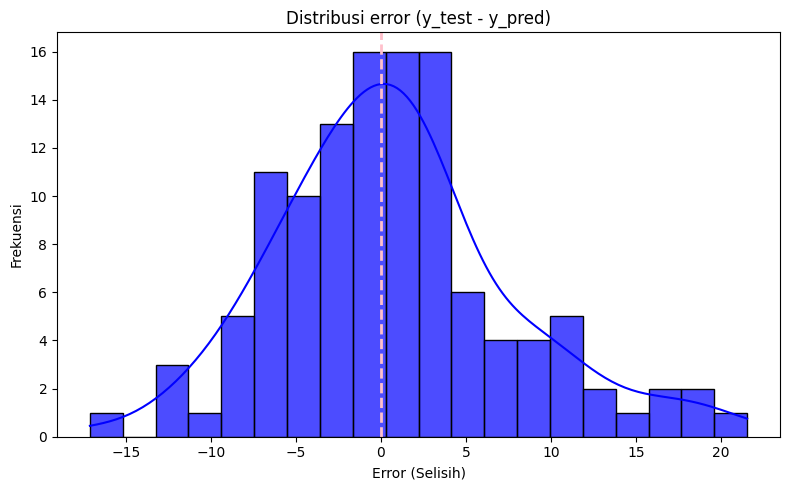

In [187]:
# Grafik distribusi error menunjukkan bahwa sebagian besar nilai error berkumpul di sekitar angka 0,
# yang menandakan bahwa sebagian besar prediksi model sudah cukup mendekati nilai sebenarnya.
# Namun masih ada beberapa error yang jauh dari 0, yang sejalan dengan nilai RMSE yang cukup tinggi.
# Jadi, model sudah dapat memberikan gambaran hubungan antara variabel input dan nilai Zn,
# tapi akurasi masih dapat ditingkatkan dengan mencoba model lain atau melakukan tuning parameter

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
errors = y_test - y_pred
sns.histplot(errors, bins=20, kde=True, color="blue", alpha=0.7)
plt.axvline(0, color='pink', linestyle='--', linewidth=2)
plt.title("Distribusi error (y_test - y_pred)")
plt.xlabel("Error (Selisih)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()